## 🌟 Problem Statement
To implement the Continuous Bag of Words (CBOW) model used in Word2Vec. The model must take context words as input and predict the target word.

## ✦ Description of the Problem
CBOW is a neural language model that produces word embeddings by predicting a word from its surrounding context. This assignment involves preparing text data, generating context-target training pairs, building a simple neural network for CBOW, and observing the output embeddings.

## ✦ Program Details
- Load a text corpus<br>
- Clean and preprocess text<br>
- Generate context-target word pairs<br>
- Build the CBOW neural network<br>
- Train the model<br>
- Output learned embeddings<br>

In [49]:
import numpy as np
import re

In [50]:
data = """Deep learning (also known as deep structured learning) is part of a broader family of machine learning methods based on artificial neural networks with representation learning. Learning can be supervised, semi-supervised or unsupervised. Deep-learning architectures such as deep neural networks, deep belief networks, deep reinforcement learning, recurrent neural networks, convolutional neural networks and Transformers have been applied to fields including computer vision, speech recognition, natural language processing, machine translation, bioinformatics, drug design, medical image analysis, climate science, material inspection and board game programs, where they have produced results comparable to and in some cases surpassing human expert performance."""
data

'Deep learning (also known as deep structured learning) is part of a broader family of machine learning methods based on artificial neural networks with representation learning. Learning can be supervised, semi-supervised or unsupervised. Deep-learning architectures such as deep neural networks, deep belief networks, deep reinforcement learning, recurrent neural networks, convolutional neural networks and Transformers have been applied to fields including computer vision, speech recognition, natural language processing, machine translation, bioinformatics, drug design, medical image analysis, climate science, material inspection and board game programs, where they have produced results comparable to and in some cases surpassing human expert performance.'

In [51]:
sentences = data.split('.')
sentences

['Deep learning (also known as deep structured learning) is part of a broader family of machine learning methods based on artificial neural networks with representation learning',
 ' Learning can be supervised, semi-supervised or unsupervised',
 ' Deep-learning architectures such as deep neural networks, deep belief networks, deep reinforcement learning, recurrent neural networks, convolutional neural networks and Transformers have been applied to fields including computer vision, speech recognition, natural language processing, machine translation, bioinformatics, drug design, medical image analysis, climate science, material inspection and board game programs, where they have produced results comparable to and in some cases surpassing human expert performance',
 '']

In [52]:
clean_sent=[]
for sentence in sentences:
    if sentence=="":
        continue
    sentence = re.sub('[^A-Za-z0-9]+', ' ', (sentence))
    sentence = re.sub(r'(?:^| )\w (?:$| )', ' ', (sentence)).strip()
    sentence = sentence.lower()
    clean_sent.append(sentence)

clean_sent

['deep learning also known as deep structured learning is part of a broader family of machine learning methods based on artificial neural networks with representation learning',
 'learning can be supervised semi supervised or unsupervised',
 'deep learning architectures such as deep neural networks deep belief networks deep reinforcement learning recurrent neural networks convolutional neural networks and transformers have been applied to fields including computer vision speech recognition natural language processing machine translation bioinformatics drug design medical image analysis climate science material inspection and board game programs where they have produced results comparable to and in some cases surpassing human expert performance']

In [53]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [54]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(clean_sent)
sequences = tokenizer.texts_to_sequences(clean_sent)
print(sequences)

[[2, 1, 12, 13, 6, 2, 14, 1, 15, 16, 7, 17, 18, 19, 7, 8, 1, 20, 21, 22, 23, 4, 3, 24, 25, 1], [1, 26, 27, 9, 28, 9, 29, 30], [2, 1, 31, 32, 6, 2, 4, 3, 2, 33, 3, 2, 34, 1, 35, 4, 3, 36, 4, 3, 5, 37, 10, 38, 39, 11, 40, 41, 42, 43, 44, 45, 46, 47, 48, 8, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 5, 60, 61, 62, 63, 64, 10, 65, 66, 67, 11, 5, 68, 69, 70, 71, 72, 73, 74]]


In [55]:
index_to_word = {}
word_to_index = {}

for i, sequence in enumerate(sequences):
    word_in_sentence = clean_sent[i].split()
    for j, value in enumerate(sequence):
        index_to_word[value] = word_in_sentence[j]
        word_to_index[word_in_sentence[j]] = value

print(index_to_word, "\n")
print(word_to_index)

{2: 'deep', 1: 'learning', 12: 'also', 13: 'known', 6: 'as', 14: 'structured', 15: 'is', 16: 'part', 7: 'of', 17: 'a', 18: 'broader', 19: 'family', 8: 'machine', 20: 'methods', 21: 'based', 22: 'on', 23: 'artificial', 4: 'neural', 3: 'networks', 24: 'with', 25: 'representation', 26: 'can', 27: 'be', 9: 'supervised', 28: 'semi', 29: 'or', 30: 'unsupervised', 31: 'architectures', 32: 'such', 33: 'belief', 34: 'reinforcement', 35: 'recurrent', 36: 'convolutional', 5: 'and', 37: 'transformers', 10: 'have', 38: 'been', 39: 'applied', 11: 'to', 40: 'fields', 41: 'including', 42: 'computer', 43: 'vision', 44: 'speech', 45: 'recognition', 46: 'natural', 47: 'language', 48: 'processing', 49: 'translation', 50: 'bioinformatics', 51: 'drug', 52: 'design', 53: 'medical', 54: 'image', 55: 'analysis', 56: 'climate', 57: 'science', 58: 'material', 59: 'inspection', 60: 'board', 61: 'game', 62: 'programs', 63: 'where', 64: 'they', 65: 'produced', 66: 'results', 67: 'comparable', 68: 'in', 69: 'some', 

In [56]:
vocab_size = len(tokenizer.word_index) + 1
emb_size = 10
context_size = 2

contexts = []
targets = []

for sequence in sequences:
    for i in range(context_size, len(sequence) - context_size):
        target = sequence[i]
        context = [sequence[i - 2], sequence[i - 1], sequence[i + 1], sequence[i + 2]]

        contexts.append(context)
        targets.append(target)
print(contexts, "\n")
print(targets)

[[2, 1, 13, 6], [1, 12, 6, 2], [12, 13, 2, 14], [13, 6, 14, 1], [6, 2, 1, 15], [2, 14, 15, 16], [14, 1, 16, 7], [1, 15, 7, 17], [15, 16, 17, 18], [16, 7, 18, 19], [7, 17, 19, 7], [17, 18, 7, 8], [18, 19, 8, 1], [19, 7, 1, 20], [7, 8, 20, 21], [8, 1, 21, 22], [1, 20, 22, 23], [20, 21, 23, 4], [21, 22, 4, 3], [22, 23, 3, 24], [23, 4, 24, 25], [4, 3, 25, 1], [1, 26, 9, 28], [26, 27, 28, 9], [27, 9, 9, 29], [9, 28, 29, 30], [2, 1, 32, 6], [1, 31, 6, 2], [31, 32, 2, 4], [32, 6, 4, 3], [6, 2, 3, 2], [2, 4, 2, 33], [4, 3, 33, 3], [3, 2, 3, 2], [2, 33, 2, 34], [33, 3, 34, 1], [3, 2, 1, 35], [2, 34, 35, 4], [34, 1, 4, 3], [1, 35, 3, 36], [35, 4, 36, 4], [4, 3, 4, 3], [3, 36, 3, 5], [36, 4, 5, 37], [4, 3, 37, 10], [3, 5, 10, 38], [5, 37, 38, 39], [37, 10, 39, 11], [10, 38, 11, 40], [38, 39, 40, 41], [39, 11, 41, 42], [11, 40, 42, 43], [40, 41, 43, 44], [41, 42, 44, 45], [42, 43, 45, 46], [43, 44, 46, 47], [44, 45, 47, 48], [45, 46, 48, 8], [46, 47, 8, 49], [47, 48, 49, 50], [48, 8, 50, 51], [8, 

In [57]:
#printing features with target
for i in range(5):
    words = []
    target = index_to_word.get(targets[i])
    for j in contexts[i]:
        words.append(index_to_word.get(j))
    print(words," -> ", target)

['deep', 'learning', 'known', 'as']  ->  also
['learning', 'also', 'as', 'deep']  ->  known
['also', 'known', 'deep', 'structured']  ->  as
['known', 'as', 'structured', 'learning']  ->  deep
['as', 'deep', 'learning', 'is']  ->  structured


In [58]:
# Convert the contexts and targets to numpy arrays
X = np.array(contexts)
Y = np.array(targets)

In [59]:
print(X)
print("------------")
print(Y)

[[ 2  1 13  6]
 [ 1 12  6  2]
 [12 13  2 14]
 [13  6 14  1]
 [ 6  2  1 15]
 [ 2 14 15 16]
 [14  1 16  7]
 [ 1 15  7 17]
 [15 16 17 18]
 [16  7 18 19]
 [ 7 17 19  7]
 [17 18  7  8]
 [18 19  8  1]
 [19  7  1 20]
 [ 7  8 20 21]
 [ 8  1 21 22]
 [ 1 20 22 23]
 [20 21 23  4]
 [21 22  4  3]
 [22 23  3 24]
 [23  4 24 25]
 [ 4  3 25  1]
 [ 1 26  9 28]
 [26 27 28  9]
 [27  9  9 29]
 [ 9 28 29 30]
 [ 2  1 32  6]
 [ 1 31  6  2]
 [31 32  2  4]
 [32  6  4  3]
 [ 6  2  3  2]
 [ 2  4  2 33]
 [ 4  3 33  3]
 [ 3  2  3  2]
 [ 2 33  2 34]
 [33  3 34  1]
 [ 3  2  1 35]
 [ 2 34 35  4]
 [34  1  4  3]
 [ 1 35  3 36]
 [35  4 36  4]
 [ 4  3  4  3]
 [ 3 36  3  5]
 [36  4  5 37]
 [ 4  3 37 10]
 [ 3  5 10 38]
 [ 5 37 38 39]
 [37 10 39 11]
 [10 38 11 40]
 [38 39 40 41]
 [39 11 41 42]
 [11 40 42 43]
 [40 41 43 44]
 [41 42 44 45]
 [42 43 45 46]
 [43 44 46 47]
 [44 45 47 48]
 [45 46 48  8]
 [46 47  8 49]
 [47 48 49 50]
 [48  8 50 51]
 [ 8 49 51 52]
 [49 50 52 53]
 [50 51 53 54]
 [51 52 54 55]
 [52 53 55 56]
 [53 54 56

In [60]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Lambda 

In [61]:
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=emb_size),
    Lambda(lambda x: tf.reduce_mean(x, axis=1)),
    Dense(256, activation='relu'),
    Dense(512, activation='relu'),
    Dense(vocab_size, activation='softmax')
])


In [62]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [63]:
history = model.fit(X, Y, epochs=80)

Epoch 1/80


2025-11-16 15:34:56.247737: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.0231 - loss: 4.3177
Epoch 2/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.0518 - loss: 4.3100
Epoch 3/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.0636 - loss: 4.3021
Epoch 4/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.0675 - loss: 4.2906
Epoch 5/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.0558 - loss: 4.2805
Epoch 6/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.0440 - loss: 4.2644
Epoch 7/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.0558 - loss: 4.2338
Epoch 8/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.0675 - loss: 4.1971
Epoch 9/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.0597 - loss: 4.1515
Epoch 10/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.0401 - loss: 4.1129    
Epoch 11/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.0518 - loss: 4.0241
Epoch 12/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.0675 - loss: 3.9861
Epoch 13

<Axes: >

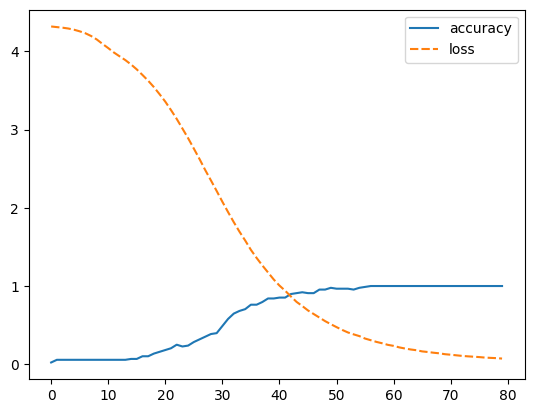

In [64]:
import seaborn as sns
sns.lineplot(model.history.history)

In [65]:
from sklearn.decomposition import PCA

embeddings = model.get_weights()[0]

pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

In [66]:
print("'Deep learning (also known as deep structured learning) is part of a broader family of machine learning methods based on artificial neural networks with representation learning. Learning can be supervised, semi-supervised or unsupervised. Deep-learning architectures such as deep neural networks, deep belief networks, deep reinforcement learning, recurrent neural networks, convolutional neural networks and Transformers have been applied to fields including computer vision, speech recognition, natural language processing, machine translation, bioinformatics, drug design, medical image analysis, climate science, material inspection and board game programs, where they have produced results comparable to and in some cases surpassing human expert performance.")

'Deep learning (also known as deep structured learning) is part of a broader family of machine learning methods based on artificial neural networks with representation learning. Learning can be supervised, semi-supervised or unsupervised. Deep-learning architectures such as deep neural networks, deep belief networks, deep reinforcement learning, recurrent neural networks, convolutional neural networks and Transformers have been applied to fields including computer vision, speech recognition, natural language processing, machine translation, bioinformatics, drug design, medical image analysis, climate science, material inspection and board game programs, where they have produced results comparable to and in some cases surpassing human expert performance.


In [67]:
# test model: select some sentences from above paragraph
test_sentenses = [
    "known as structured learning",
    "transformers have applied to",
    "where they produced results",
    "cases surpassing expert performance"
]

In [68]:
for sent in test_sentenses:
    test_words = sent.split(" ")
#     print(test_words)
    x_test =[]
    for i in test_words:
        x_test.append(word_to_index.get(i))
    x_test = np.array([x_test])
#     print(x_test)
    
    pred = model.predict(x_test)
    pred = np.argmax(pred[0])
    print("pred ", test_words, "\n=", index_to_word.get(pred),"\n\n")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
pred  ['known', 'as', 'structured', 'learning'] 
= deep 


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
pred  ['transformers', 'have', 'applied', 'to'] 
= been 


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
pred  ['where', 'they', 'produced', 'results'] 
= have 


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
pred  ['cases', 'surpassing', 'expert', 'performance'] 
= human 


